### Working with Multiple Inputs

In [21]:
from typing import TypedDict, List, Literal
from langgraph.graph import StateGraph

In [4]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [15]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""

    print("Before Processing: ", state)

    state['result'] = f"Hi {state['name']}, your sum is {sum(state['values'])}"
    
    print("After Processing: ", state)

    return state

In [16]:
graph = StateGraph(AgentState)
graph.add_node("process_node", process_values)
graph.set_entry_point("process_node")
graph.set_finish_point("process_node")
app = graph.compile()

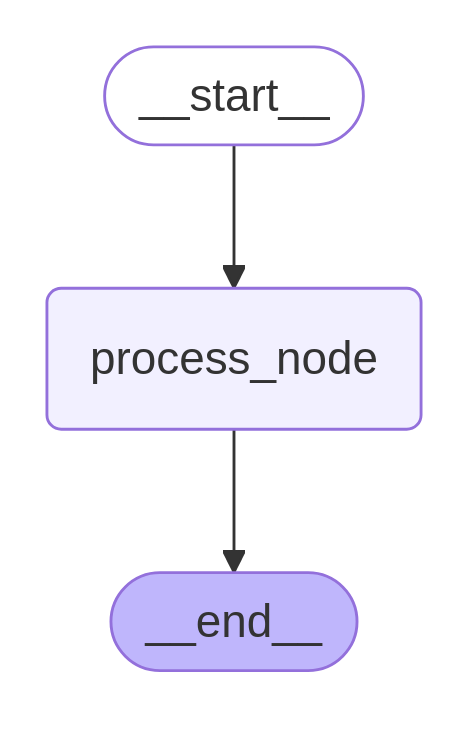

In [17]:
import nest_asyncio
nest_asyncio.apply()

from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
display(Image(app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)))

In [18]:
result = app.invoke({"values":[1,2,3,4,5,6], "name": "Saai"})

Before Processing:  {'values': [1, 2, 3, 4, 5, 6], 'name': 'Saai'}
After Processing:  {'values': [1, 2, 3, 4, 5, 6], 'name': 'Saai', 'result': 'Hi Saai, your sum is 21'}


In [19]:
result

{'values': [1, 2, 3, 4, 5, 6],
 'name': 'Saai',
 'result': 'Hi Saai, your sum is 21'}

#### Advanced Processor - Exercise 2

In [31]:
class ASE2(TypedDict):
    nums: List[int]
    operation: Literal['+','*']
    name: str
    result: str

In [44]:
def process_op(state: ASE2) -> ASE2:
    if state['operation'] not in ['+', '*']:
        raise Exception("operation must be + or *")
    state['result'] = f"Hey {state['name']}, your {state['operation']} on the values {state['nums']}, result is {eval(state['operation'].join([str(i) for i in state['nums']]))}"
    return state

In [45]:
graph = StateGraph(ASE2)
graph.add_node("process_node", process_op)
graph.set_entry_point("process_node")
graph.set_finish_point("process_node")
app = graph.compile()

In [47]:
result = app.invoke({"nums":[1,2,3,4,5,6], "name": "Saai", "operation": "+"})

In [48]:
result

{'nums': [1, 2, 3, 4, 5, 6],
 'operation': '+',
 'name': 'Saai',
 'result': 'Hey Saai, your + on the values [1, 2, 3, 4, 5, 6], result is 21'}